In [34]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
df = pd.read_csv('AD.csv')

In [36]:
columns_to_drop = ['Clothing ID','Age','Recommended IND','Positive Feedback Count','Division Name',
'Department Name','Class Name']
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Sneha
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sneha
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sneha
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [39]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [40]:
def clean_text(text):
    if pd.isnull(text):  # Check if text is NaN
        return ''
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize words
    return ' '.join(words)

In [41]:
text_columns = ['Title', 'Review Text']  # Add other text columns here
for column in text_columns:
    df[column] = df[column].apply(clean_text)

In [42]:
df.dropna(subset=text_columns, inplace=True)

In [43]:
df.to_csv('AD_cleaned.csv', index=False)

In [44]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)['compound']

In [46]:
df['sentiment_score'] = df['Review Text'].apply(get_sentiment_scores)

In [47]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [48]:
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

In [49]:
df.to_csv('sentiment_analysis_results.csv', index=False)

In [50]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

# Load the dataset with sentiment analysis results
df = pd.read_csv('sentiment_analysis_results.csv')

# Function to convert rating to sentiment label
def convert_rating_to_sentiment(rating):
    if rating == 5 or rating==4:
        return 'Positive'
    elif rating == 1 or rating==2:
        return 'Negative'
    else:
        return 'Neutral'

# Convert 'reviews.rating' to sentiment labels
df['actual_sentiment'] = df['Rating'].apply(convert_rating_to_sentiment)

# Calculate accuracy
accuracy = accuracy_score(df['actual_sentiment'], df['sentiment'])
print("Accuracy:", accuracy)

Accuracy: 0.7491697181299497


In [51]:
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment of a custom string
def classify_sentiment(custom_string):
    # Get sentiment score for the custom string
    sentiment_score = analyzer.polarity_scores(custom_string)['compound']

    # Classify sentiment based on the sentiment score
    if sentiment_score >= 0.05:
        return 'Positive'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Test the sentiment analysis model on a custom string
custom_string = "I am in love with the product."
predicted_sentiment = classify_sentiment(custom_string)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: Positive


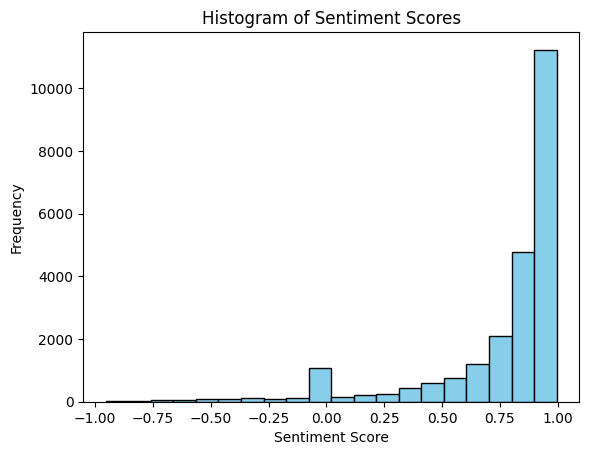

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sentiment_analysis_results.csv')

# Assuming the dataset contains a column named 'sentiment_score'
sentiment_scores = df['sentiment_score']

# Create a histogram
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')

# Show the plot
plt.show()

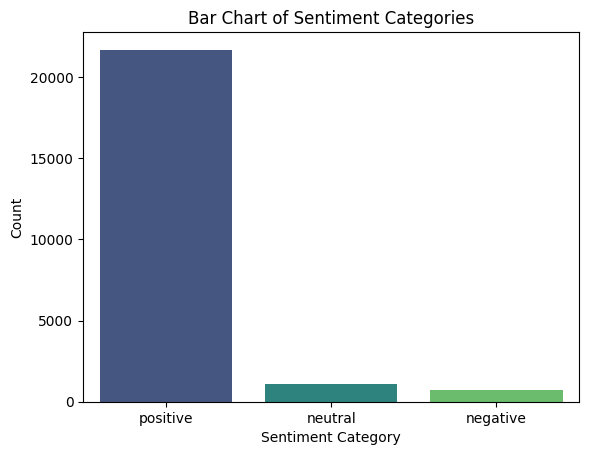

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('sentiment_analysis_results.csv')

# Derive sentiment categories using for loop and if-elif conditions
sentiment_categories = []
for score in df['sentiment_score']:
    if score > 0.05:
        sentiment_categories.append('positive')
    elif score < -0.05:
        sentiment_categories.append('negative')
    else:
        sentiment_categories.append('neutral')

# Convert sentiment_categories to a pandas Series
sentiment_categories = pd.Series(sentiment_categories)

# Count the occurrences of each sentiment category
sentiment_counts = sentiment_categories.value_counts()

# Plot the bar chart
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Categories')

# Show the plot
plt.show()

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset with cleaned text and sentiment labels
df = pd.read_csv('AD_cleaned.csv')

# Handle missing values in text data
df['Review Text'].fillna('', inplace=True)

# Handle missing values in target variable
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

# Convert ratings to sentiment labels: 'positive', 'negative', 'neutral'
df['sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review Text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for efficiency
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment labels for the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.811409110259685


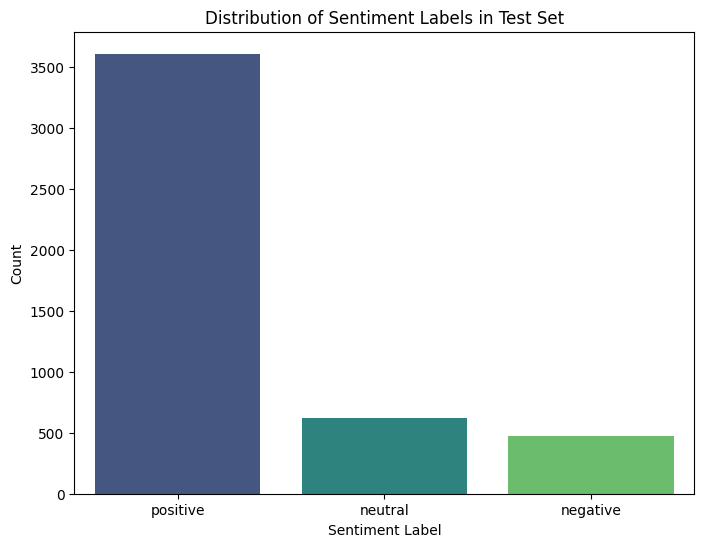

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment label in the test set
sentiment_counts = y_test.value_counts()

# Plotting bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of Sentiment Labels in Test Set')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [56]:
# Test the classifier on a custom string
custom_string = "The product is love."
custom_string_tfidf = vectorizer.transform([custom_string])
predicted_sentiment = svm_classifier.predict(custom_string_tfidf)
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: positive


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset with cleaned text and sentiment labels
df = pd.read_csv('AD_cleaned.csv')

# Handle missing values in text data
df['Review Text'].fillna('', inplace=True)

# Handle missing values in target variable
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

# Convert ratings to sentiment labels: 'positive', 'negative', 'neutral'
df['sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

# Split the dataset into features (X) and labels (y)
X = df['Review Text']
y = df['sentiment']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting features for efficiency
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predict sentiment labels for the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7790549169859514


In [58]:
# Test the classifier on a custom string
custom_string = "The product is worst."
custom_string_tfidf = vectorizer.transform([custom_string])
predicted_sentiment = nb_classifier.predict(custom_string_tfidf)
print("Predicted Sentiment:", predicted_sentiment[0])

Predicted Sentiment: negative


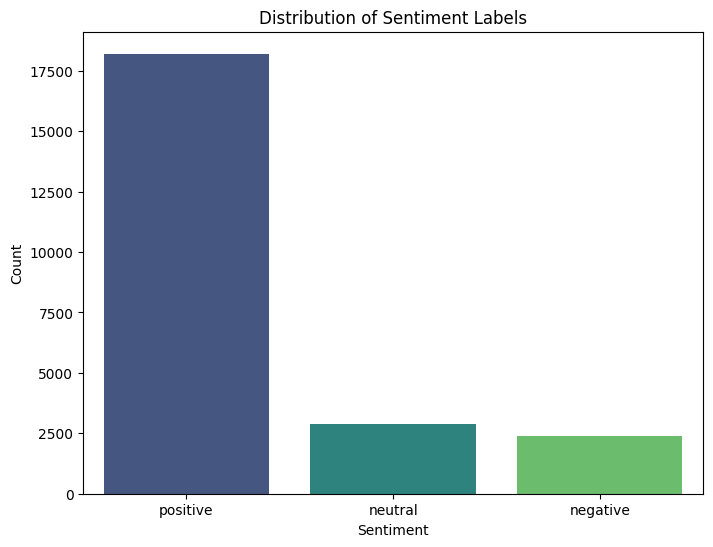

In [59]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()